# PINT Demo
IPTA Student Week 2024

## Reading par and tim files
The first thing to do is to read some data files. We'll use an example dataset distributed with PINT.

In [5]:
from pint.models import get_model_and_toas

from pint.config import examplefile

In [6]:
from pint.logging import setup as setup_log

# This will turn off debug messages. They can be annoying.
setup_log(level="WARNING")

2

In [7]:
print(examplefile(""))

/home/abhimanyu/Work/PINT/src/pint/data/examples/


In [8]:
# We use the examplefile function to get the example data file paths.
model, toas = get_model_and_toas(
    examplefile("NGC6440E.par"), 
    examplefile("NGC6440E.tim")
)

In [9]:
# This function has a lot of options.
# Useful options for IPTA:
#    allow_tcb=True   ---  Read and convert TCB par files to TDB.
#    allow_T2=True    ---  Read and infer the binary model when 'BINARY T2' is found.
help(get_model_and_toas)

Help on function get_model_and_toas in module pint.models.model_builder:

get_model_and_toas(parfile: Union[str, pathlib.Path, IO], timfile: Union[str, pathlib.Path, IO], ephem: str = None, include_bipm: bool = None, bipm_version: str = None, planets: bool = None, usepickle: bool = False, tdb_method: str = 'default', include_pn: bool = True, picklefilename: str = None, allow_name_mixing: bool = False, limits: str = 'warn', allow_tcb: bool = False, allow_T2: bool = False, force_binary_model: str = None, add_tzr_to_model: bool = True, **kwargs) -> Tuple[pint.models.timing_model.TimingModel, pint.toa.TOAs]
    Load a timing model and a related TOAs, using model commands as needed
    
    Parameters
    ----------
    parfile : str
        The parfile name, or a file-like object to read the parfile contents from
    timfile : str
        The timfile name, or a file-like object to read the timfile contents from
    ephem : str, optional
        If not None (default), this ephemeris will be

## What is in a model?

In [10]:
# We get a par file representation if we print the model object.
# The free parameters are marked with "1" after their value.
# The output also contains some extra metadata which is useful for troubleshooting.
print(model)

# Created: 2024-06-18T13:39:17.023531
# PINT_version: 1.0+304.g1f2c5962
# User: Abhimanyu Susobhanan (abhimanyu)
# Host: abhimanyu-HP-Envy-x360-2-in-1-Laptop-15-fh0xxx
# OS: Linux-6.5.0-35-generic-x86_64-with-glibc2.35
# Python: 3.9.19 (main, May  6 2024, 19:43:03) 
# [GCC 11.2.0]
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2019)
UNITS                                 TDB
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                    0
RAJ                     17:48:52.75000000 1 0.04999999999999999584
DECJ                   -20:21:29.00000000 1 0.40000000000000002220
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH           53750.0000000000000000
F0                     

In [11]:
# The timing model parameters can be accessed like so.
# model.<PARAM>.quantity is usually an astropy.units.Quantity object.
print(model.F1.quantity)

-1.181e-15 Hz / s


In [12]:
# Some parameters have other types of values, like strings, datetimes, booleans, etc.
print(model.PSR.quantity, type(model.PSR.quantity))
print(model.PEPOCH.quantity, type(model.PEPOCH.quantity))
print(model.PLANET_SHAPIRO.quantity, type(model.PLANET_SHAPIRO.quantity))

1748-2021E <class 'str'>
53750.0000000000000000 <class 'astropy.time.core.Time'>
False <class 'bool'>


In [13]:
# Getting a list of all parameters
print(model.params)

['PSR', 'TRACK', 'EPHEM', 'CLOCK', 'UNITS', 'START', 'FINISH', 'RM', 'INFO', 'TIMEEPH', 'T2CMETHOD', 'BINARY', 'DILATEFREQ', 'DMDATA', 'NTOA', 'CHI2', 'CHI2R', 'TRES', 'DMRES', 'POSEPOCH', 'PX', 'RAJ', 'DECJ', 'PMRA', 'PMDEC', 'F0', 'PEPOCH', 'F1', 'CORRECT_TROPOSPHERE', 'PLANET_SHAPIRO', 'NE_SW', 'SWP', 'SWM', 'DM', 'DM1', 'DMEPOCH', 'TZRMJD', 'TZRSITE', 'TZRFRQ']


In [14]:
# Getting a list of free parameters
print(model.free_params)

['RAJ', 'DECJ', 'F0', 'F1', 'DM']


In [56]:
# A model is made of components. These represent the different processes that
# affect the measured TOA. Each parameter is associated with a model component.
print(model.components)

{'AstrometryEquatorial': AstrometryEquatorial(
    MJDParameter(   POSEPOCH            53750.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:48:52.75000000 (hourangle) +/- 0h00m00.05s frozen=False),
    AngleParameter( DECJ                -20:21:29.00000000 (deg) +/- 0d00m00.4s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)), 'TroposphereDelay': TroposphereDelay(
    boolParameter(  CORRECT_TROPOSPHERE N                 frozen=True)), 'SolarSystemShapiro': SolarSystemShapiro(
    boolParameter(  PLANET_SHAPIRO      N                 frozen=True)), 'SolarWindDispersion': SolarWindDispersion(
    floatParameter( NE_SW               0.0               (1 / cm3) frozen=True),
    floatParameter( SWP                 2.0               () frozen=True),
    

## What's in TOAs?

In [15]:
# We can get a summary of the TOAs by calling the print_summary function.
toas.print_summary()

Number of TOAs:  62
Number of commands:  0
Number of observatories: 1 ['gbt']
MJD span:  53478.286 to 54187.587
Date span: 2005-04-18 06:51:39.290648106 to 2007-03-28 14:05:44.808308037
gbt TOAs (62):
  Min freq:      1549.609 MHz
  Max freq:      2212.109 MHz
  Min error:     13.2 us
  Max error:     118 us
  Median error:  22.1 us



In [16]:
# TOAs are internally stored as an astropy table.
print(toas.table)

# You'll see multiple representations of the TOA values - mjd (astropy Time objects), 
# mjd_float (float values), and tdbld (long double values).
# These are clock-corrected TOAs in the TDB timescale.

# Other columns to note are error (TOA measurement uncertainties), freq (Observing frequencies),
# etc.

# Solar system ephemerides are also stored in this table (e.g., the obs_sun_pos column)

index        mjd        ...                obs_sun_pos                
                        ...                     km                    
----- ----------------- ... ------------------------------------------
    0 53478.28587141954 ...    132300219.00569908 .. 28301415.35919997
    1 53483.27670518884 ...    125950526.54719904 .. 32709720.94995396
    2 53489.46838978825 ...    116811489.08005148 .. 37847344.14576268
    3 53679.87564592083 ...  -107617035.22788034 .. -40589908.43799952
    4 53679.87564536537 ...  -107617036.21817447 .. -40589908.02744341
    5  53679.8756449276 ...  -107617036.99862644 .. -40589907.70388365
    6 53679.87564457819 ... -107617037.62156363 .. -40589907.445626356
    7 53679.87564513386 ...  -107617036.63090621 .. -40589907.85633311
    8 53681.70075099914 ...  -104248039.63196312 .. -41917934.22431718
    9 53681.95454490266 ...   -103778953.6981405 .. -42099238.00618152
  ...               ... ...                                        ...
   52 

In [17]:
toas.table.colnames

['index',
 'mjd',
 'mjd_float',
 'error',
 'freq',
 'obs',
 'flags',
 'delta_pulse_number',
 'tdb',
 'tdbld',
 'ssb_obs_pos',
 'ssb_obs_vel',
 'obs_sun_pos']

## Plotting residuals

<ErrorbarContainer object of 3 artists>

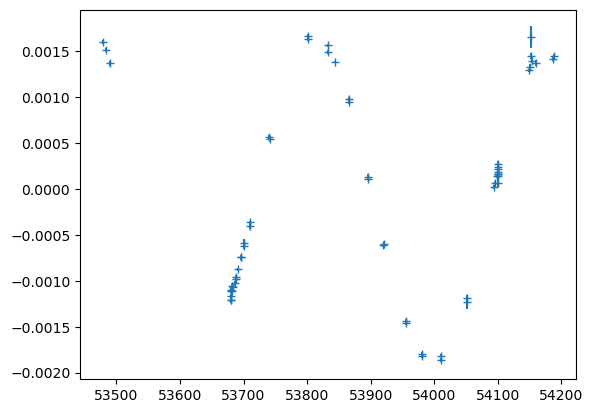

In [18]:
# Now let us see what the residuals look like.
from pint.residuals import Residuals
from matplotlib import pyplot as plt

# The Residuals class is used to evaluate timing residuals, chi2, etc.
res = Residuals(toas, model)

plt.errorbar(toas.get_mjds(), res.calc_time_resids(), res.get_data_error(), ls="", marker="+")

In [19]:
# Well, that's not a good fit.
print(res.chi2_reduced)

2820.0106634066078637


## Fitting the timing model

In [20]:
from pint.fitter import Fitter

In [22]:
# Select the best fitter for the given dataset.
ftr = Fitter.auto(toas, model)
print(ftr)

# DownhillWLSFitter is used for narrowband TOAs when the model only has 
# white noise.

In [23]:
# Let's do the fit.
ftr.fit_toas(maxiter=5)

<ErrorbarContainer object of 3 artists>

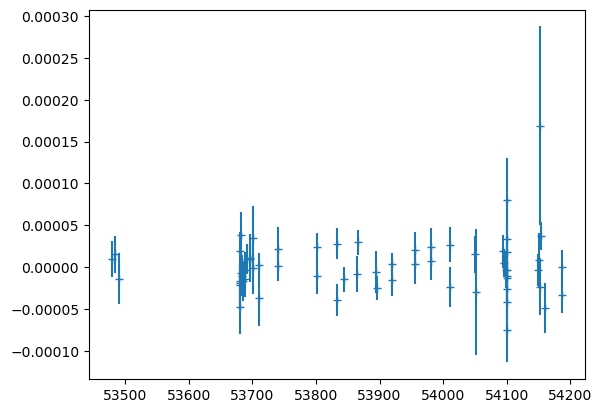

In [64]:
# Now let's look at the post-fit residuals.
plt.errorbar(toas.get_mjds(), ftr.resids.calc_time_resids(), ftr.resids.get_data_error(), ls="", marker="+")

Text(0, 0.5, 'Residuals (s)')

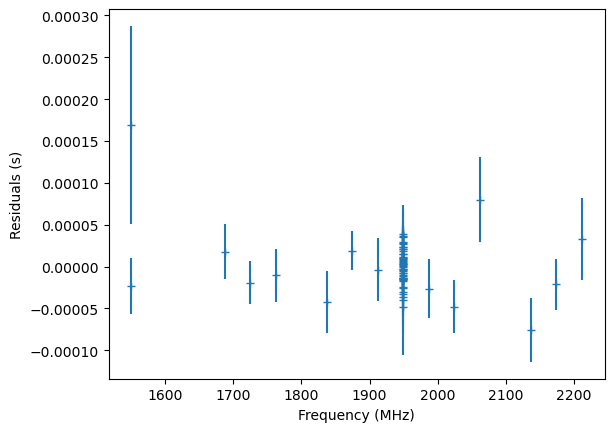

In [24]:
# We can plot against frequency to see if the DM has been modeled correctly.
plt.errorbar(toas.get_freqs(), ftr.resids.calc_time_resids(), ftr.resids.get_data_error(), ls="", marker="+")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Residuals (s)")

In [25]:
# That's much better.
print(ftr.resids.chi2_reduced)

1.0638341384814312405


In [26]:
# Let us view the post-fit timing model
print(ftr.model)

# Created: 2024-06-18T13:53:55.970405
# PINT_version: 1.0+304.g1f2c5962
# User: Abhimanyu Susobhanan (abhimanyu)
# Host: abhimanyu-HP-Envy-x360-2-in-1-Laptop-15-fh0xxx
# OS: Linux-6.5.0-35-generic-x86_64-with-glibc2.35
# Python: 3.9.19 (main, May  6 2024, 19:43:03) 
# [GCC 11.2.0]
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2019)
UNITS                                 TDB
START              53478.2858714195382639
FINISH             54187.5873241702319097
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                   62
CHI2                    59.57471175496015
CHI2R                  1.0638341384814312
TRES                21.182108436303946443
RAJ                     17:48:52.80034690 1 0.00013524663578313304
DECJ                   -20:21:29.38334051 1 0.03

In [27]:
# Let's compare the pre-fit and post-fit par files.
print(model.compare(ftr.model))

WARNING  (pint.models.timing_model      ): Parameter RAJ has changed significantly (    372.26 sigma2)
WARNING  (pint.models.timing_model      ): Parameter DECJ has changed significantly (    -11.67 sigma2)
WARNING  (pint.models.timing_model      ): Parameter F0 has changed significantly (     20.60 sigma2)
WARNING  (pint.models.timing_model      ): Uncertainty on parameter F1 has increased (unc2/unc1 = 1.44)
WARNING  (pint.models.timing_model      ): Parameter DM has changed significantly (      6.12 sigma2)


PARAMETER                               NGC6440E.par                      NGC6440E.par   Diff_Sigma1   Diff_Sigma2
-------------------     ----------------------------   -------------------------------   -----------   -----------
PSR                                       1748-2021E                        1748-2021E                            
EPHEM                                          DE421                             DE421                            
CLOCK                                   TT(BIPM2019)                      TT(BIPM2019)                            
UNITS                                            TDB                               TDB                            
TIMEEPH                                         FB90                              FB90                            
T2CMETHOD                                   IAU2000B                          IAU2000B                            
DILATEFREQ                                     False                            

In [69]:
# Now that we have a good fit, we should save the post-fit par file.
ftr.model.write_parfile("NGC6440E.fit.par")

## Manipulating TOAs

In [28]:
# We can get a single TOA using the [] operator.
print(toas[0])

1 TOAs starting at MJD 53478.28587141954


In [29]:
# Or a range of TOAs 
print(toas[0:10])

10 TOAs starting at MJD 53478.28587141954


In [30]:
from astropy import units as u

# Or TOAs according to some criterion
selection = toas.get_errors() < 50 * u.us
toas[selection]

59 TOAs starting at MJD 53478.28587141954

In [31]:
# We can also get the TOA attributes using the [] syntax.
toas["obs"]

gbt
gbt
gbt
gbt
gbt
gbt
gbt
gbt
gbt
gbt
gbt


In [74]:
# We can concatenate two TOAs objects using the + operator.
toas1 = toas[:10]
toas2 = toas[10:20]
toas3 = toas1 + toas2
print(toas3)

20 TOAs starting at MJD 53478.28587141954


In [75]:
# We can shift the TOA values using the toas.adjust_TOAs function.
# Use this only if you know what you're doing.
help(toas.adjust_TOAs)

Help on method adjust_TOAs in module pint.toa:

adjust_TOAs(delta: Union[astropy.time.core.TimeDelta, astropy.units.quantity.Quantity]) -> None method of pint.toa.TOAs instance
    Apply a time delta to TOAs.
    
    Adjusts the time (MJD) of the TOAs by applying delta, which should
    be a scalar or have the same shape as ``self.table['mjd']``.  This function does not change
    the pulse numbers column, if present, but does recompute ``mjd_float``,
    the TDB times, and the observatory positions and velocities.
    
    Parameters
    ----------
    delta : astropy.time.TimeDelta or astropy.units.Quantity
        The time difference to add to the MJD of each TOA



In [76]:
# We can compute the pulse numbers like this:
toas.compute_pulse_numbers(ftr.model)
print(toas.get_pulse_numbers())

 pulse_number
             
-------------
-1716398183.0
-1689882944.0
-1656988022.0
 -645521434.0
 -645521434.0
 -645521434.0
 -645521434.0
 -645521434.0
 -635826494.0
 -634478342.0
          ...
 2050286728.0
 2051645444.0
 1584774770.0
 1584774770.0
 1584774770.0
 1584774770.0
 1584774770.0
 1584774770.0
 1584774770.0
 1584774770.0
Length = 62 rows


## Some interesting derived quantities

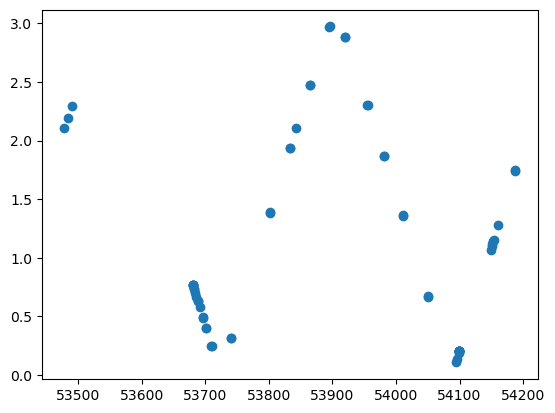

In [77]:
# Solar elongation
plt.scatter(toas.get_mjds(), ftr.model.sun_angle(toas))

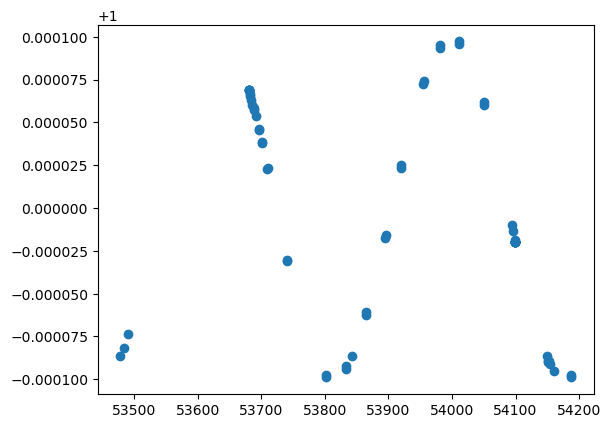

In [78]:
# Barycentered observing frequency
# The plotted thing is the Doppler factor.
plt.scatter(toas.get_mjds(), ftr.model.barycentric_radio_freq(toas) / toas.get_freqs())

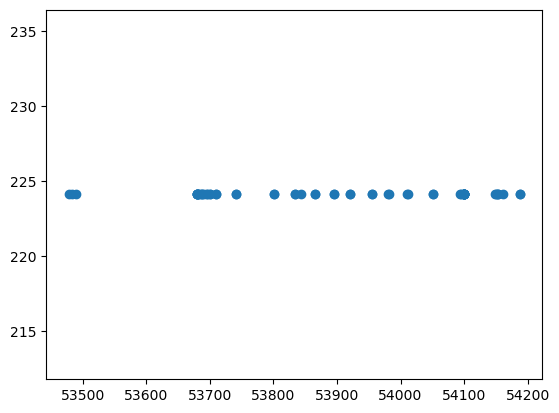

In [79]:
# Total DM
# This is a constant because we only have a constant DM in the timing model.
plt.scatter(toas.get_mjds(), ftr.model.total_dm(toas))

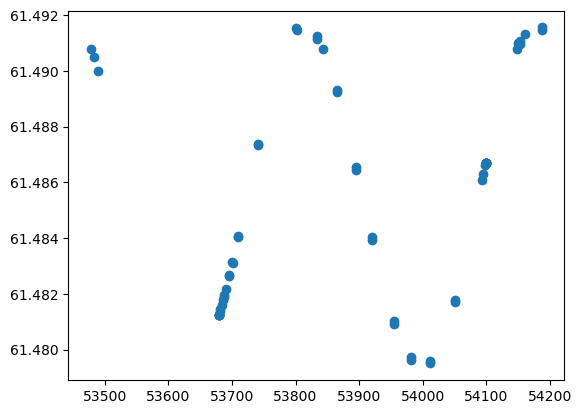

In [80]:
# Topocentric pulse frequency
# We are seeing the Doppler shifted pulse frequency.
plt.scatter(toas.get_mjds(), ftr.model.d_phase_d_toa(toas))

## Fitting for white noise

Let's see if we need an EFAC for this dataset.

In [32]:
from pint.models import get_model
from io import StringIO

# Add EFAC to the par file. Note that we are setting the fitting flag "1".
# Note how we are using StringIO to treat a string like a file.
par1 = str(ftr.model) + "EFAC tel gbt 1 1"
model1 = get_model(StringIO(par1))
print(model1)

# Created: 2024-06-18T13:57:29.461256
# PINT_version: 1.0+304.g1f2c5962
# User: Abhimanyu Susobhanan (abhimanyu)
# Host: abhimanyu-HP-Envy-x360-2-in-1-Laptop-15-fh0xxx
# OS: Linux-6.5.0-35-generic-x86_64-with-glibc2.35
# Python: 3.9.19 (main, May  6 2024, 19:43:03) 
# [GCC 11.2.0]
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2019)
UNITS                                 TDB
START              53478.2858714195382639
FINISH             54187.5873241702319097
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                   62
CHI2                    59.57471175496015
CHI2R                  1.0638341384814312
TRES                   21.182108436303945
RAJ                     17:48:52.80034690 1 0.00013524663578313304
DECJ                   -20:21:29.38334051 1 0.03

In [33]:
# Now do the fit.
ftr1 = Fitter.auto(toas, model1)
ftr1.fit_toas(maxiter=5)

In [34]:
# The EFAC has now been fit!
# Note that the uncertainty has been set.
# The measurement is consistent with 1, so we probably don't need an EFAC.
ftr1.model.EFAC1

maskParameter(EFAC1 tel gbt 0.9802461176807077 +/- 0.08802870001117231 ())

In [35]:
# Let us do a model comparison of EFAC vs no EFAC using the 
# Akaike information criterion.
from pint.utils import akaike_information_criterion

aic_noefac = akaike_information_criterion(ftr.model, toas)
aic_efac = akaike_information_criterion(ftr1.model, toas)
print(aic_noefac, aic_efac)

# The AIC without the EFAC is lower, so we don't need an EFAC.

-1245.1333871904073607 -1243.1820971396863972


In [36]:
from scipy.stats import normaltest

# We can also check the "whitened" residuals to see if they are Gaussian.
wres = ftr.resids.calc_whitened_resids()
normaltest(wres.value.astype(float))

# Seems like the timing model is good enough.

NormaltestResult(statistic=0.6573659863099152, pvalue=0.7198711846728575)

## Simulating TOAs

In [108]:
from pint.simulation import make_fake_toas_uniform, make_fake_toas_fromtim
from astropy import units as u
import numpy as np

In [109]:
# I just realized that there is a bug in `make_fake_toas_fromtim` :(
# that causes it to use the wrong BIPM version. This is a workaround
# to make things work.
model.CLOCK.value = 'TT(BIPM2023)'

In [110]:
# How to make TOAs based on an existing tim file
# The `add_noise` option tells the function to add white noise.
# If EFACs and EQUADs are there in the model, those are incorporated
# into the simulated white noise.
tsim1 = make_fake_toas_fromtim(
    timfile=examplefile("NGC6440E.tim"),
    model=model,
    add_noise=True,
)

In [111]:
# The `add_correlated_noise` option can be used to simulate 
# correlated noise (ECORR, red noise, DM Noise, etc) if it's 
# given in the timing model.
#
# Simulating cross-pulsar correlated signals like the GWB is not
# (yet?) supported. 

Text(0, 0.5, 'Residuals (s)')

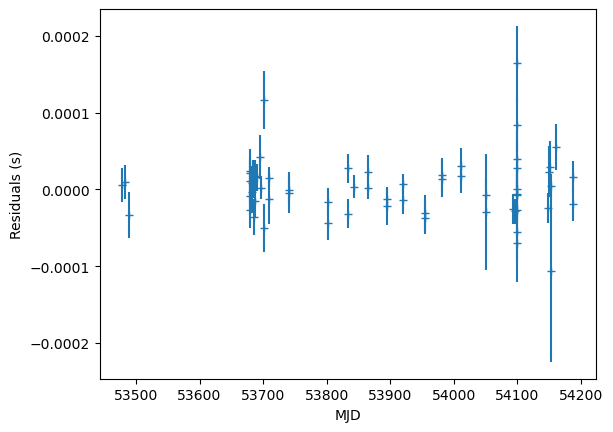

In [112]:
res_sim1 = Residuals(tsim1, model)
plt.errorbar(tsim1.get_mjds(), res_sim1.calc_time_resids(), res_sim1.get_data_error(), ls="", marker="+")
plt.xlabel("MJD")
plt.ylabel("Residuals (s)")

In [115]:
# How to make TOAs based on an existing tim file
# The `add_noise` option tells the function to add white noise.
# If EFACs and EQUADs are there in the model, those are incorporated
# into the simulated white noise.
#
# The `add_correlated_noise` option works here too.
#
# The `multi_freqs_in_epoch` simulates multiple frequency
# observations in an epoch. This is useful for simulating
# subbanded TOAs and/or multiple observing bands. 
tsim2 = make_fake_toas_uniform(
    startMJD=55000,
    endMJD=56000,
    ntoas=200,
    model=model,
    freq=np.linspace(1200, 1500, 8) * u.MHz,
    obs="ao",
    error=1*u.us,
    add_noise=True,
    multi_freqs_in_epoch=True,
    flags={"be": "foo", "fe": "bar"},
)

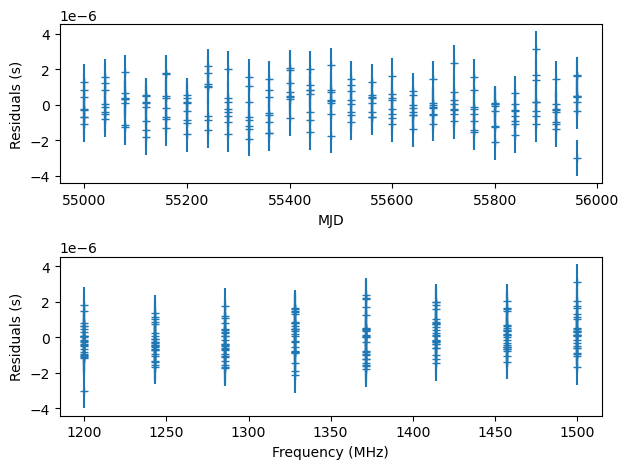

In [116]:
res_sim2 = Residuals(tsim2, model)

plt.subplot(211)
plt.errorbar(tsim2.get_mjds(), res_sim2.calc_time_resids(), res_sim2.get_data_error(), ls="", marker="+")
plt.xlabel("MJD")
plt.ylabel("Residuals (s)")

plt.subplot(212)
plt.errorbar(tsim2.get_freqs(), res_sim2.calc_time_resids(), res_sim2.get_data_error(), ls="", marker="+")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Residuals (s)")

plt.tight_layout()

In [37]:
toas.write_TOA_file("kjhk")

TimingModel(
  AbsPhase(
    MJDParameter(   TZRMJD              53801.3860512007484954 (d) frozen=True),
    strParameter(   TZRSITE             1                 frozen=True),
    floatParameter( TZRFRQ              1949.609          (MHz) frozen=True)),
  AstrometryEquatorial(
    MJDParameter(   POSEPOCH            53750.0000000000000000 (d) frozen=True),
    floatParameter( PX                  0.0               (mas) frozen=True),
    AngleParameter( RAJ                 17:48:52.80034690 (hourangle) +/- 0h00m00.00013525s frozen=False),
    AngleParameter( DECJ                -20:21:29.38334051 (deg) +/- 0d00m00.03285269s frozen=False),
    floatParameter( PMRA                0.0               (mas / yr) frozen=True),
    floatParameter( PMDEC               0.0               (mas / yr) frozen=True)),
  DispersionDM(
    floatParameter( DM                  224.1137963928532875 (pc / cm3) +/- 0.034938980510629936 pc / cm3 frozen=False),
    floatParameter( DM1                 UNSET,


In [117]:
# Combine different simulations of the same pulsar with the + operator.
tsim = tsim1 + tsim2

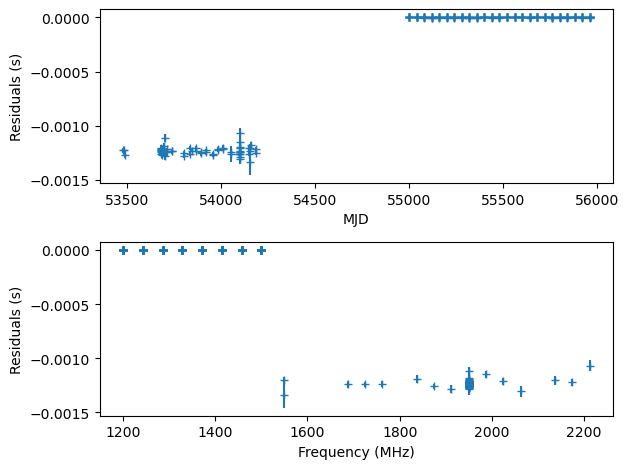

In [118]:
res_sim = Residuals(tsim, model)

plt.subplot(211)
plt.errorbar(tsim.get_mjds(), res_sim.calc_time_resids(), res_sim.get_data_error(), ls="", marker="+")
plt.xlabel("MJD")
plt.ylabel("Residuals (s)")

plt.subplot(212)
plt.errorbar(tsim.get_freqs(), res_sim.calc_time_resids(), res_sim.get_data_error(), ls="", marker="+")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Residuals (s)")

plt.tight_layout()

In [ ]:
# We need a JUMP between the two simulations.
# Exercise - Fit this JUMP.
# Hint - the second simulation has `be` and `fe` flags set.

## Fitting for red noise 

In [141]:
from pint.utils import wavex_setup, plrednoise_from_wavex, find_optimal_nharms
from copy import deepcopy

In [132]:
par_rn = str(model) + """
    TNREDAMP    -13.0
    TNREDGAM    3.5
    TNREDC      30
"""

In [133]:
model_rn = get_model(StringIO(par_rn))

In [134]:
print(model_rn)

# Created: 2024-06-17T14:08:40.097764
# PINT_version: 1.0+302.g224e5f13
# User: Abhimanyu Susobhanan (abhimanyu)
# Host: abhimanyu-HP-Envy-x360-2-in-1-Laptop-15-fh0xxx
# OS: Linux-6.5.0-35-generic-x86_64-with-glibc2.35
# Python: 3.9.19 (main, May  6 2024, 19:43:03) 
# [GCC 11.2.0]
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2023)
UNITS                                 TDB
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                    0
RAJ                     17:48:52.75000000 1 0.04999999999999998890
DECJ                   -20:21:29.00000000 1 0.40000000000000002220
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH           53750.0000000000000000
F0                     

In [137]:
tsimrn = make_fake_toas_uniform(
    startMJD=55000,
    endMJD=56000,
    ntoas=200,
    model=model_rn,
    freq=1400 * u.MHz,
    obs="ao",
    error=0.5*u.us,
    add_noise=True,
    add_correlated_noise=True,
    include_bipm=True,
)

Text(0, 0.5, 'Residuals (s)')

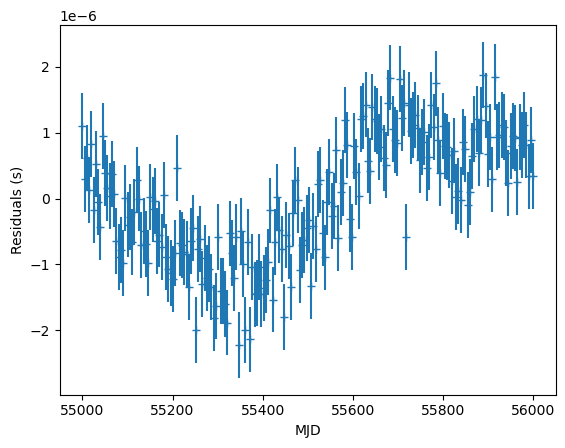

In [138]:
res_simrn = Residuals(tsimrn, model_rn)

plt.errorbar(tsimrn.get_mjds(), res_simrn.calc_time_resids(), res_simrn.get_data_error(), ls="", marker="+")
plt.xlabel("MJD")
plt.ylabel("Residuals (s)")

In [142]:
# Find the optimum number of harmonics from the simulated data
Nharm, aics = find_optimal_nharms(model, tsimrn, component="WaveX", nharms_max=30)

In [144]:
Nharm, aics = Nharm

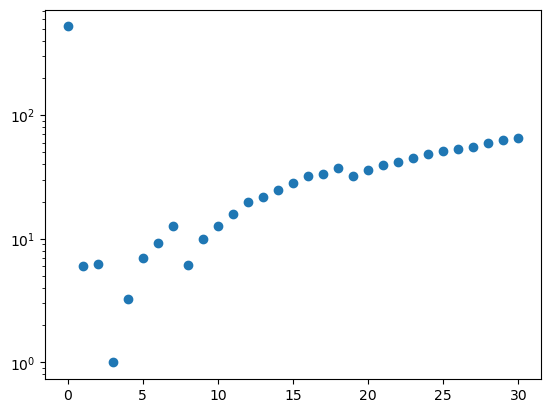

In [149]:
plt.scatter(np.arange(31), aics+1)
plt.yscale("log")

In [159]:
modelwx=deepcopy(model)
Tspan = tsimrn.get_mjds().max() - tsimrn.get_mjds().min()
wavex_setup(modelwx, T_span=Tspan, n_freqs=3)

array([1, 2, 3])

In [160]:
ftrwx = Fitter.auto(tsimrn, modelwx)
ftrwx.fit_toas()

In [161]:
modelpl = plrednoise_from_wavex(ftrwx.model)

In [162]:
print(modelpl)

# Created: 2024-06-17T14:29:43.730680
# PINT_version: 1.0+302.g224e5f13
# User: Abhimanyu Susobhanan (abhimanyu)
# Host: abhimanyu-HP-Envy-x360-2-in-1-Laptop-15-fh0xxx
# OS: Linux-6.5.0-35-generic-x86_64-with-glibc2.35
# Python: 3.9.19 (main, May  6 2024, 19:43:03) 
# [GCC 11.2.0]
# Format: pint
PSR                            1748-2021E
EPHEM                               DE421
CLK                          TT(BIPM2023)
UNITS                                 TDB
START              54999.9999999198253819
FINISH             56000.0000000471472222
TIMEEPH                              FB90
T2CMETHOD                        IAU2000B
DILATEFREQ                              N
DMDATA                                  N
NTOA                                  200
CHI2                    177.0801632190851
CHI2R                  0.9419157618036442
TRES                0.4704786966737775373
RAJ                     17:48:52.74995213 1 0.00010702045869100597
DECJ                   -20:21:29.01076605 1 0.00

In [163]:
wres = ftrwx.resids.calc_whitened_resids()

Text(0, 0.5, 'Whitened Residuals')

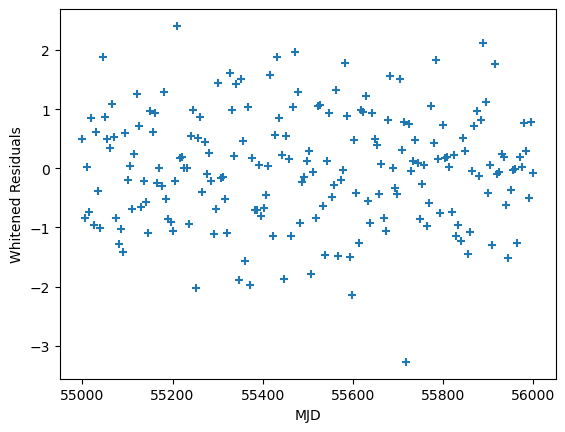

In [165]:
plt.scatter(tsimrn.get_mjds(), wres, marker="+")
plt.xlabel("MJD")
plt.ylabel("Whitened Residuals")

In [172]:
# Are the whitened residuals Gaussian and white?
normaltest(wres.value.astype(float))

# We can also run the Ljung-Box test to check if the whitened residuals are uncorrelated.
# Unfortunately, that's not there in scipy AFAIK.

NormaltestResult(statistic=0.6354759934300905, pvalue=0.7277934477108926)

In [ ]:
# Similarly, we can also do DM noise.
# See an example here -- https://nanograv-pint.readthedocs.io/en/latest/examples/rednoise-fit-example.html 

## More useful examples 

Check out https://nanograv-pint.readthedocs.io/en/latest/tutorials.html